In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# sample data
X, y = make_blobs(n_samples=300, n_features=2, centers=4, random_state=42)

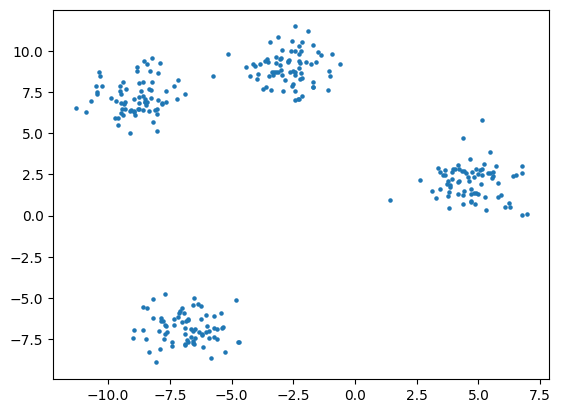

In [13]:
plt.scatter(X[:, 0], X[:, 1], s=5)

For K = 2, the average silhouette_score is : 0.5902182019276141
For K = 3, the average silhouette_score is : 0.7569108532473462
For K = 4, the average silhouette_score is : 0.7915830011443039
For K = 5, the average silhouette_score is : 0.6641874438840668


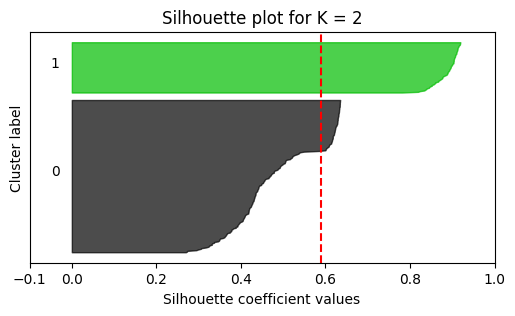

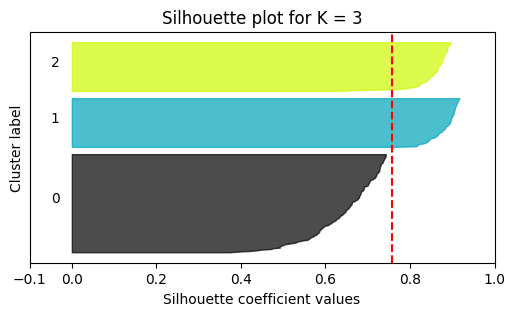

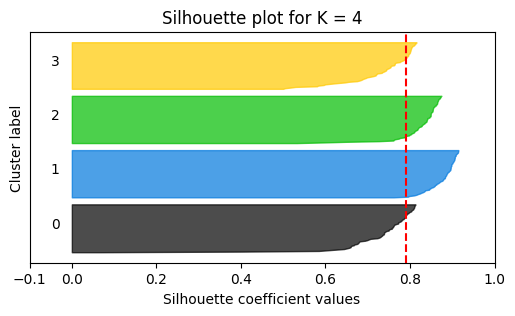

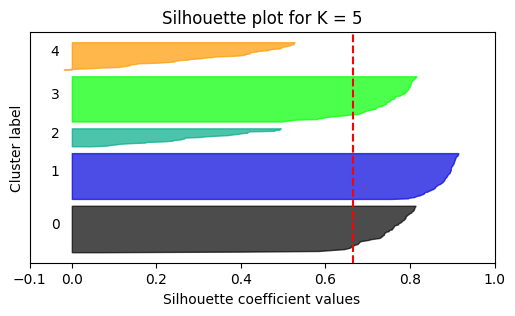

In [16]:
silhouette_scores = []

for n_clusters in range(2, 6):
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 3)

    # init kmeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For K = {n_clusters}, the average silhouette_score is : {silhouette_avg}")
    silhouette_scores.append(silhouette_avg)

    # calculate silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # aggregate silhouette scores for samples in cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    ax.set_title(f"Silhouette plot for K = {n_clusters}")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    

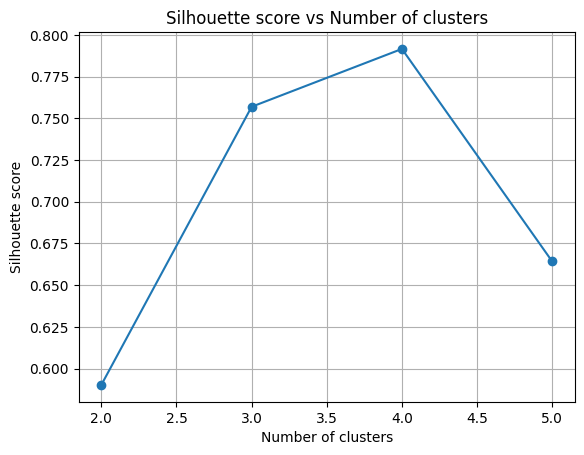

In [18]:
# plot silhouette scores for different K
plt.figure()
plt.plot(range(2, 6), silhouette_scores, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette score vs Number of clusters")
plt.grid(True)
plt.show()